In [1]:
%pylab inline
from astropy import units
from astropy import constants
from cosmotools import rvir, rvir2
from profiles import *
import os.path

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
font = {'size':13, 'family':'serif'}
matplotlib.rc('font', **font)

In [6]:
# Constants
h = 0.7
H = 67.8 * units.km / units.s / units.Mpc
print G, H

4.51835939627e-39 kpc3 / (s2 solMass) 67.8 km / (Mpc s)


Here we model of the MW, our first model is for a MW of mass $ M_{vir}=1E12 M\odot$.
The MW have a bulge a disk and dark matter halo:

- The MW Bulge have a mass of $M_b = 1E10 M\odot$ this is modeled with a 
Hernquist profile with scale length $r_b = 0.7 kpc$.

- The disk of the MW have a mass of $M_d = 6.5E10 M\odot$ and is modeled as ...

- The Dark Matter halo have a total mass of $M_h = M_{vir} - M_d - M_b$


$M_h = M_{vir} - M_b - M_d =  1E12 - 6.5E10 - 1E10 = 9.25E11 M\odot$

## MW dark matter halo model:

In [16]:
def halo_c(M):# from http://adsabs.harvard.edu/abs/2011ApJ...740..102K eq.11
    h = 0.7
    C = 9.60 * (M * h/ 1E12)**(-0.075)
    return C

In [21]:
MW_halo_c = halo_c(9.25E11)
MW_halo_rvir = rvir(9.25E11, 0)
MW_halo_rvir2 = rvir2(9.25E11, 0)

R_H1 = MW_halo_rvir / MW_halo_c 
R_H2 = MW_halo_rvir2 / MW_halo_c 


print MW_halo_c, MW_halo_rvir, MW_halo_rvir2

print R_H1, R_H2

9.91809468574 254.542265412 kpc 253.480911915 kpc
25.664431877 kpc 25.5574200435 kpc


In [48]:
!python GalIC_input.py 9.25E11 253.4809 25.55

This code assume that your initial parameters are Mvir(NFW), Rvir(NFW) and Rs(NFW)
Vvir (NFW) 124.761304185 km / s
cvir(NFW) =  9.92097455969
c200(NFW) =  7.35401313818
a200 =  53.2291765882
avir =  51.2645234547
M200 =  775348261197.0
M_h_200 =  1.25615055293e+12
M_h_vir =  1.35427649457e+12
v_h_200 =  155.814252833 km / s
v_h_vir =  141.666916746 km / s
a_200 Volker =  55.5251058514 kpc


In [49]:
M_halo_hern =  1.35427649457E12
a_halo = 51.2645234547

In [67]:
r10 = linspace(0, 10, 100)
r20 = linspace(0, 20, 100)
r30 = linspace(0, 30, 100)
r50 = linspace(0, 50, 100)
r100 = linspace(0, 100, 100)
r260 = linspace(0, 260, 100)

In [74]:
teo_mass = mass_hernquist(a_halo ,r20, M_halo_hern)
teo_mass260 = mass_hernquist(a_halo ,r260, M_halo_hern)

teo_den = dens_hernquist(a_halo, r20, M_halo_hern)
teo_den260 = dens_hernquist(a_halo, r260, M_halo_hern)


teo_vc = vc_hernquist(a_halo, r20, 0, 0, M_halo_hern)
teo_vc30 = vc_hernquist(a_halo, r30, 0, 0, M_halo_hern)
teo_vc260 = vc_hernquist(a_halo, r260, 0, 0, M_halo_hern)
teo_vc260_volk = vc_hernquist(55.525, r260, 0, 0, M_halo_hern)

In [75]:
# Models
#-----------------------------------------
M_chervin_halo = 92.94E10 / h # from lsf.out of GalIC 200
A_chervin_halo = 28.1096 / h  # 200
print "chervin = ", M_chervin_halo, A_chervin_halo

chervin =  1.32771428571e+12 40.1565714286


# Data from simulations

In [76]:
IC_chervin = loadtxt('../ICs/MW_models/MW1/chevin_rotcurve.txt', skiprows=1)
IC_hack = loadtxt('../ICs/MW_models/MW1/MW1_rotcurve.txt', skiprows=1)
IC_MW = loadtxt('../ICs/MW_models/MW1/rotcurve.txt', skiprows=1)

In [77]:
vc_chervin_halo = IC_chervin[:,2]
vc_chervin_MW = IC_chervin[:,1]
#vc_MW = IC_MW[:,1]
#vc_MW_halo = IC_MW[:,2]
#vc_MW_r = IC_MW[:,0] / h

r = IC_chervin[:,0] / h
#vc_hack_halo = IC_hack[:,1]
#r2 = IC_hack[:,0] / h 

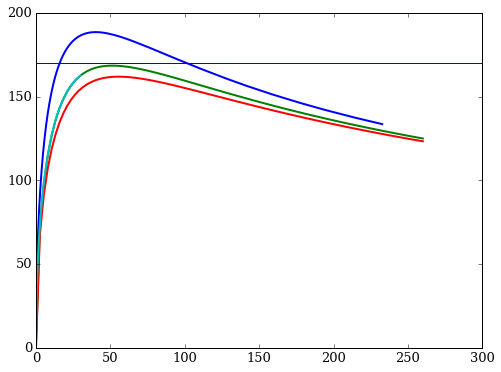

In [78]:
figure(figsize=(8, 6))
plot(r, vc_chervin_halo, lw=2)
#plot(r, vc_chervin_MW, lw=2)
#plot(r2, vc_hack_halo, lw=2)
plot(r260, teo_vc260, lw=2)
plot(r260, teo_vc260_volk, lw=2)

plot(r30, teo_vc30, lw=2)
axhline(170)

#plot(r20, vc_teo2, lw=2)
#plot(vc_MW_r, vc_MW_halo, lw=2)
#plot(vc_MW_r, vc_MW, lw=2)

In [57]:
mass_MW_NFW = mass_NFW(9.9209, r260, 0, 0, 9.25E11)
dens_MW_NFW = dens_NFW(9.9209, r260, 0, 0, 9.25E11) 

#mass_MW_chervin =  mass_hernquist(40.15, r,  1.327E12)

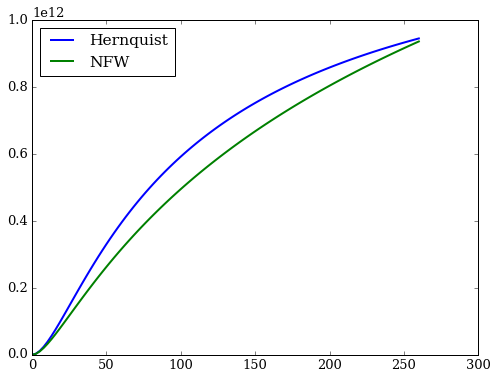

In [65]:
figure(figsize=(8, 6))
plot(r260, teo_mass260, label='Hernquist', lw=2)
plot(r260, mass_MW_NFW, label='NFW', lw=2)
#plot(r, mass_MW_chervin)
#axvline(260)
#axhline(9.25E11)
legend(loc='best')
savefig('../doc/MW_enclosedM.png', bbox_inches='tight')

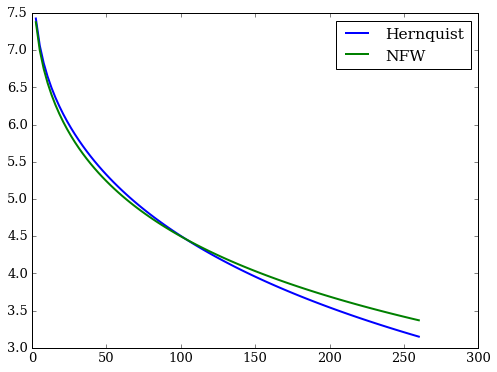

In [47]:
figure(figsize=(8, 6))
plot(r260, log10(teo_den260.value), label='Hernquist', lw=2)
plot(r260, log10(dens_MW_NFW.value), label='NFW', lw=2)
#plot(r, mass_MW_chervin)
#axvline(261)
#axhline(1E12)
legend(loc='best')
#rvir(1E12, 0)
savefig('../doc/MW_enclosedRho.png', bbox_inches='tight')